In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

# Circuit Basics

### Building the circuit

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits

circ = QuantumCircuit(3)

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0,1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0,2)

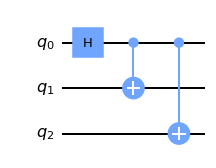

In [4]:
circ.draw('mpl')

In [5]:
# Import Aer
from qiskit import Aer

In [6]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [7]:
# Create a Quantum Program for execution
job = execute(circ,backend)

In [8]:
result = job.result()

In [9]:
outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


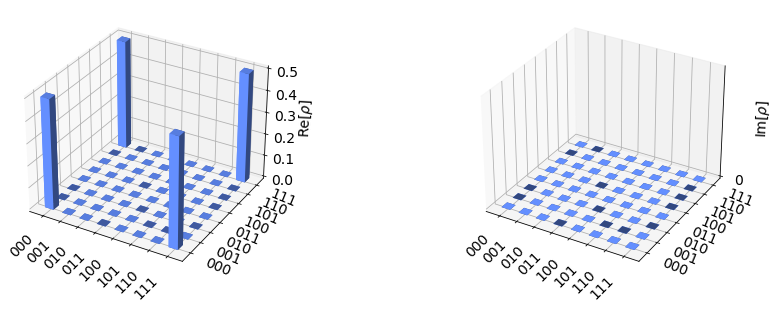

In [10]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

### Unitary backend

In [11]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ,backend)
result = job.result()

outputstate = result.get_unitary(circ,decimals=3)
print(outputstate)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     

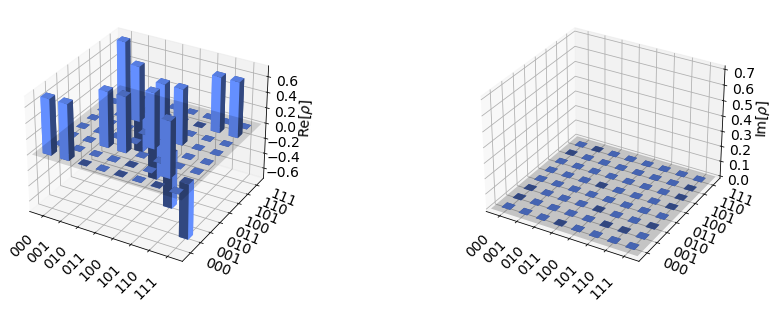

In [12]:
plot_state_city(outputstate)

# OpenQASM backend

In [13]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))

# map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ + meas

qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

* This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits.

In [16]:
# Use Aer's qasm_simulator

backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.

job_sim = execute(qc,backend_sim,shots=1024)

# Grab the results from the job.
results_sim = job_sim.result()

In [19]:
counts = results_sim.get_counts(qc)
print(counts)

{'000': 489, '111': 535}


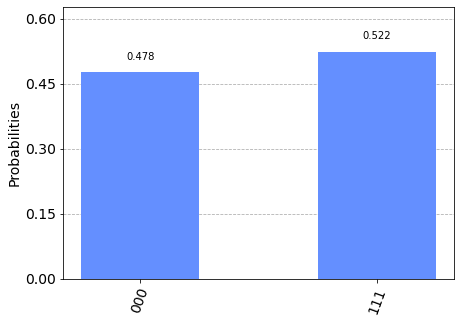

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [21]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright